# The Building Blocks of Neural Networks

Let's look at a concrete example of a neural network using the MNIST dataset to learn to classify handwritten digits.   
The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 x 28 pixels) into their 10 categories (0 through 9). The MNIST consists of 60,000 training images, plus 10,000 test images. 

We start by loading the MNIST dataset in Keras:

In [16]:
# loading the MNIST dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images and train_labels from the training set, the data that the model will learn from. The model will then be tested on the test set, `test_images` and `test_labels`. The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.  

Let's look at one of the training data:

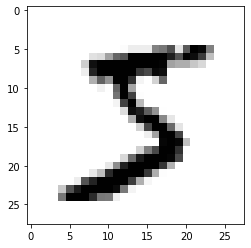

In [22]:
from matplotlib import pyplot as plt
plt.imshow(train_images[0], cmap=plt.cm.binary)

In general, all current machine learning systems use tensors as their basic data structure. Tensors are containers of data. They are a generalization of matrices to an arbitrary number of dimensions. A matrix is actually a rank-2 tensor. In the context of tensors, a dimension is often called an axis.  

In [19]:
# Display the number of axes of the tensor
train_images.ndim

3

In [20]:
# Here is the shape
train_images.shape

(60000, 28, 28)

In [21]:
# Data type:
train_images.dtype

dtype('uint8')

So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers.

The workflow will be as follows: First, we'll feed the neural network the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels.  Finally, we’ll ask the network to produce predictions for `test_images`, and we’ll verify whether these predictions match the labels from `test_labels`.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# The network architecture
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2022-02-07 10:03:56.587797: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


When using TensorFlow, you define your layers using `Sequential`. Inside the `Sequential`, you then specify what each layer looks like. The core building block of neural networks is the layer. Each layer extract some representations out of the data fed into it. Most of deep learning consists of chaining together simple layers that will implement a form of progressive *data distillation*.  
Here, our model consists of a sequence of two *Dense* layers. `Dense` means a set of fully connected neurons.  

To make the model ready for training, we need to pick three more things as part of the compilation step:

* An optimizer
* A loss function
* Metrics to monitor during training and testing

In [5]:
# The compilation step
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Before training, we'll process the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval:

In [6]:
# Preparing the image data
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images =test_images.astype('float32')/255

We are now ready to train the model, which in Keras is done via a call to the model's `fit()` method -- we fit the model to its training data.

In [7]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2543 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1027 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0678 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0371 - accuracy: 0.9892


Two quantities are displayed during training: the loss of the model over the training data, and the accuracy of the model over the training data.  We quickly reach an accuracy of 98.9\% on the training data.   

Now that we have a trained model, we can use it to predict class probabilities for new digits.

In [9]:
# Make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([7.8905543e-10, 1.1168512e-11, 1.0510281e-06, 1.0717879e-05,
       3.7910339e-12, 1.7885085e-08, 8.1539195e-15, 9.9998808e-01,
       1.0858616e-08, 1.1468433e-07], dtype=float32)

Each number of index `i` in that array corresponds to the probability that digit image `test_digits[0]` belongs to class `i`.  
This first test digit has the highest probability score (almost 1) at index 7: So according to our model, it must be a 7:

In [11]:
predictions[0][7]

0.9999881

In [10]:
# using argmax() to get the index with the max probability
predictions[0].argmax()

7

We can check that it matches the test label:

In [12]:
test_labels[0]

7

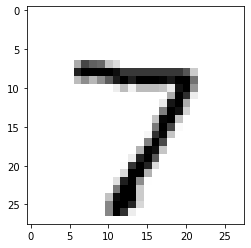

In [23]:
plt.imshow(test_images[0], cmap=plt.cm.binary)

Now let's see, on average, how good is our model at classifying new digits:

In [13]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test-set accuracy = {test_acc}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0626 - accuracy: 0.9803
test accuracy = 0.9803000092506409


The test-set accuracy turns out to be 98\%, which is a bit lower than the training-set accuracy. This gap between training accuracy and test accuracy is an example of overfitting: The fact that machine learning models tend to perform worse on new data than on their training data.